/Users/vigneshkumarthangarajan/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


1    7841
0    7841
Name: income, dtype: int64


/Users/vigneshkumarthangarajan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy_score of Logistic regression 0.8314558979808714
Balanced_Accuracy_score of Logistic regression 0.8312595229215094
ROC AUC score of Logistic regression 0.8312595229215095
Average_precision_score ofLogistic regression 0.7713678330883315
[[1873  464]
 [ 329 2039]]
True Negative: 1873 False Positive: 464 False Negative: 329 True Positive: 2039
F1 score of Logistic regression 0.8371997536440157
Precision recall fscore support:  (0.8146224530563324, 0.8610641891891891, 0.8371997536440157, None)
Metrics matthews corrcoef of Logistic regression 0.6638645693184766


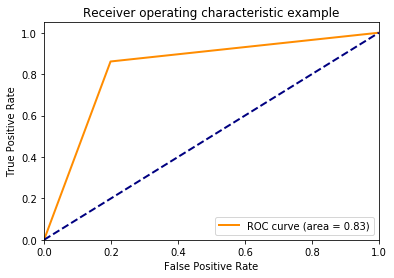

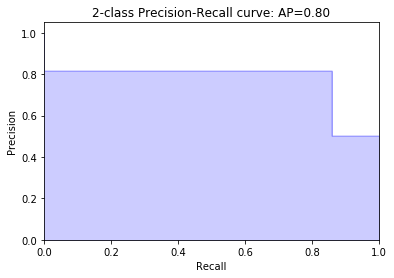

Accuracy_score of Dec Tree 0.7951115834218916
Balanced_Accuracy_score of Dec Tree 0.795248333217685
ROC AUC score of Dec Tree 0.7952483332176851
Average_precision_score ofDec Tree 0.7408905420844535
[[1907  430]
 [ 534 1834]]
True Negative: 1907 False Positive: 430 False Negative: 534 True Positive: 1834
F1 score of Dec Tree 0.7918825561312608
Precision recall fscore support:  (0.8100706713780919, 0.7744932432432432, 0.7918825561312608, None)
Metrics matthews corrcoef of Dec Tree 0.5909021286370847


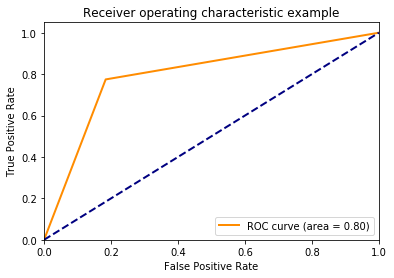

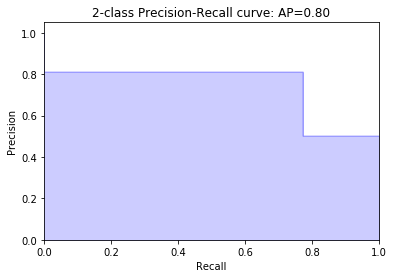

In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt
from inspect import signature


def evaluation_metric(y_pred, algo):
    print("Accuracy_score of " + algo,metrics.accuracy_score(y_test, y_pred))
    print("Balanced_Accuracy_score of " + algo,metrics.balanced_accuracy_score(y_test, y_pred))
    print("ROC AUC score of "+algo,metrics.roc_auc_score(y_test, y_pred))
    print("Average_precision_score of" + algo, metrics.average_precision_score(y_test, y_pred))
    print(metrics.confusion_matrix(y_test, y_pred))
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    print("True Negative: "+str(tn) + " False Positive: "+ str(fp) +" False Negative: " + str(fn) + " True Positive: " + str(tp))
    print("F1 score of " + algo,metrics.f1_score(y_test, y_pred, average='binary'))
    print("Precision recall fscore support: ",metrics.precision_recall_fscore_support(y_test, y_pred, average='binary'))
    print("Metrics matthews corrcoef of "+algo,metrics.matthews_corrcoef(y_test, y_pred))

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(2):
        fpr[i], tpr[i], _ = metrics.roc_curve(y_test, y_pred)
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["binary"], tpr["binary"], _ = metrics.roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc["binary"] = metrics.auc(fpr["binary"], tpr["binary"])

    plt.figure()
    lw = 2
    plt.plot(fpr[0], tpr[0], color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    precision, recall, _ = metrics.precision_recall_curve(y_test, y_pred)

    # In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
    step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
              average_precision))
    plt.show()

#Load the data with '?'' if it containe NA values
dframe = pd.read_csv("/Users/vigneshkumarthangarajan/Documents/255-Data-Mining/homework-2/data2/adult.csv",na_values="?")
work = dframe.workclass

col = dframe.head(1)

#Get Column list
col_list = list(col)

for c in col_list:
    indexNames = dframe[ dframe[c] == '?'].index 
    dframe.drop(indexNames , inplace=True)

    
dframe['income'].astype(str)
dframe['income'] = dframe['income'] == '>50K'

dframe['income'] = dframe['income'].astype(int)

dframe_maj = dframe[dframe.income == 0]
dframe_min = dframe[dframe.income == 1]

n_min_sample = len(dframe_min)

dframe_majority_downsampled = resample(dframe_maj,
                                 replace=True,     # sample with replacement
                                 n_samples=n_min_sample,    # to match minority class
                                 random_state=200) # reproducible results

# Combine minority class with downsampled majority class
dframe = pd.concat([dframe_min, dframe_majority_downsampled])

print(dframe['income'].value_counts())

labels = dframe['income']

feature_set = dframe.iloc[:,0:14]

feature_set = pd.get_dummies(feature_set)

X_train, X_test, y_train, y_test = train_test_split(feature_set, labels, test_size=0.3, random_state=1)


one_hot_encoded_training_predictors = pd.get_dummies(X_train)
one_hot_encoded_test_predictors = pd.get_dummies(X_test)
final_train, final_test = one_hot_encoded_training_predictors.align(one_hot_encoded_test_predictors,
                                                                    join='left', 
                                                                    axis=1)


# Create and Train Logistic Regression classifer object
clf_1 = LogisticRegression().fit(final_train, y_train)

#Predict the response
y_pred = clf_1.predict(final_test)

evaluation_metric(y_pred,"Logistic regression")

# Create and Train Decision Tree classifer object
clf_2 = DecisionTreeClassifier().fit(final_train,y_train)

#Predict the response for test dataset
y_pred = clf_2.predict(final_test)

evaluation_metric(y_pred,"Dec Tree")